![1606565689248](img/1606565689248.png)

![1606565697950](img/1606565697950.png)

## 准备目标识别+定位的数据集

In [1]:
## npz文件是手写数字的全部数据
import numpy as np
f = np.load('./mnist.npz')
X_train,y_train = f['x_train'],f['y_train']
X_test,y_test = f['x_test'],f['y_test']
f.close()

In [3]:
print("训练集X_train{}".format(X_train.shape))
print("训练集y_train{}".format(y_train.shape))
print("测试集X_test{}".format(X_test.shape))
print("测试集y_test{}".format(y_test.shape))


训练集X_train(60000, 28, 28)
训练集y_train(60000,)
测试集X_test(10000, 28, 28)
测试集y_test(10000,)


8

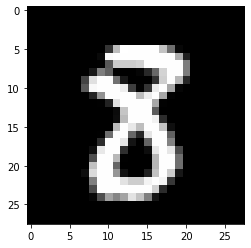

In [7]:
import matplotlib.pyplot as plt
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap='gray')
y_train[random]

In [12]:
## 过滤那些数字为8的元素
y_train == 8

array([False, False, False, ..., False, False,  True])

In [14]:
## 过滤出来所有的8的图片
len(X_train[y_train == 8])

5851

In [15]:
eights = X_train[y_train == 8]

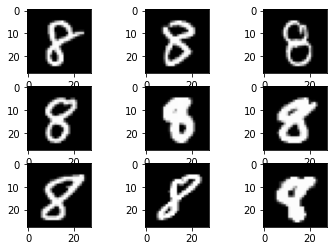

In [19]:
plt.subplot(331)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(332)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')


plt.subplot(333)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')


plt.subplot(334)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(335)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(336)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(337)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(338)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

plt.subplot(339)
random = np.random.randint(0,len(eights))
plt.imshow(eights[random],cmap='gray')

## 准备训练数据，生成一些带位置信息的图片

In [25]:
import cv2
## 用numpy做出来一个宽高都是150的黑色图片
img = np.zeros([150,150,1])
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
## 随机生成一个坐标位置
x = np.random.randint(0,150-28)
y = np.random.randint(0,150-28)

x,y

(69, 29)

In [26]:
random = np.random.randint(0,len(eights))
overlay = eights[random]

for i in range(28):
    for j in range(28):
        img[x+i][y+j] = overlay[i][j]


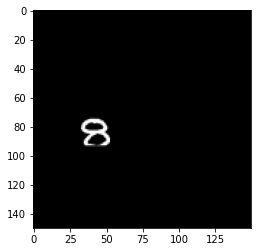

In [27]:
plt.imshow(img,cmap='gray')

(1,
 0.8666666666666667,
 0.26666666666666666,
 0.18666666666666668,
 0.18666666666666668)

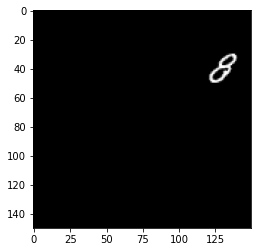

In [50]:
## 随机在一个位置放一个8
## 用numpy做出来一个宽高都是150的黑色图片
img = np.zeros([150,150,1])
## 随机生成一个坐标位置
x = np.random.randint(0,150-28)
y = np.random.randint(0,150-28)
random = np.random.randint(0,len(eights))
overlay = eights[random]

for i in range(28):
    for j in range(28):
        img[x+i][y+j] = overlay[i][j]
plt.imshow(img,cmap='gray')

labelx = (y+14.0)/150.0
labely = (x+14.0)/150.0
lablew = 28.0/150.0
lableh = 28.0/150.0

1, labelx,labely,lablew,lableh

In [52]:
## 准备一些非8的数据
noteights = X_train[y_train != 8]


(0,
 0.7466666666666667,
 0.5133333333333333,
 0.18666666666666668,
 0.18666666666666668)

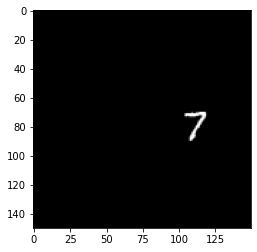

In [55]:
## 随机在一个位置放一个8
## 用numpy做出来一个宽高都是150的黑色图片
img = np.zeros([150,150,1])
## 随机生成一个坐标位置
x = np.random.randint(0,150-28)
y = np.random.randint(0,150-28)
random = np.random.randint(0,len(noteights))
overlay = noteights[random]

for i in range(28):
    for j in range(28):
        img[x+i][y+j] = overlay[i][j]
plt.imshow(img,cmap='gray')

labelx = (y+14.0)/150.0
labely = (x+14.0)/150.0
lablew = 28.0/150.0
lableh = 28.0/150.0

0, labelx,labely,lablew,lableh

In [65]:
def generate8():
    img = np.zeros([150,150,1])
    ## 随机生成一个坐标位置
    x = np.random.randint(0,150-28)
    y = np.random.randint(0,150-28)
    random = np.random.randint(0,len(eights))
    overlay = eights[random]

    for i in range(28):
        for j in range(28):
            img[x+i][y+j] = overlay[i][j]
    

    labelx = (y+14.0)/150.0
    labely = (x+14.0)/150.0
    lablew = 28.0/150.0
    lableh = 28.0/150.0

    return img,(1, labelx,labely,lablew,lableh)

In [66]:
def genrateNot8():
    img = np.zeros([150,150,1])
    ## 随机生成一个坐标位置
    x = np.random.randint(0,150-28)
    y = np.random.randint(0,150-28)
    random = np.random.randint(0,len(noteights))
    overlay = noteights[random]

    for i in range(28):
        for j in range(28):
            img[x+i][y+j] = overlay[i][j]
   

    labelx = (y+14.0)/150.0
    labely = (x+14.0)/150.0
    lablew = 28.0/150.0
    lableh = 28.0/150.0

    return img,(0, labelx,labely,lablew,lableh)

In [67]:
X = []
y = []
for i in range(0,5000):
    img,label = generate8()
    X.append(img)
    y.append(label)
for i in range(0,4000):
    img,label = genrateNot8()
    X.append(img)
    y.append(label)

(1, 0.62, 0.72, 0.18666666666666668, 0.18666666666666668)

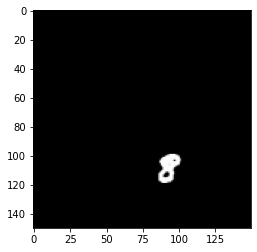

In [73]:
plt.imshow(X[0],cmap='gray')
y[0]

## 卷积神经网络

In [74]:
## Input -->Conv -->relu -->conv--->relu--->pool--->FC---->output(5)
## 线性网络 Sequential
## input (150,150,1) 灰度图
## conv( 3,3) 16层
## relu
## maxpooling
## conv(3,3) 32层
## relu
## maxpooling
## Flatten()
## Dense(?)
## Relu
## Dense(5)


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,Flatten,MaxPooling2D

In [82]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(5))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

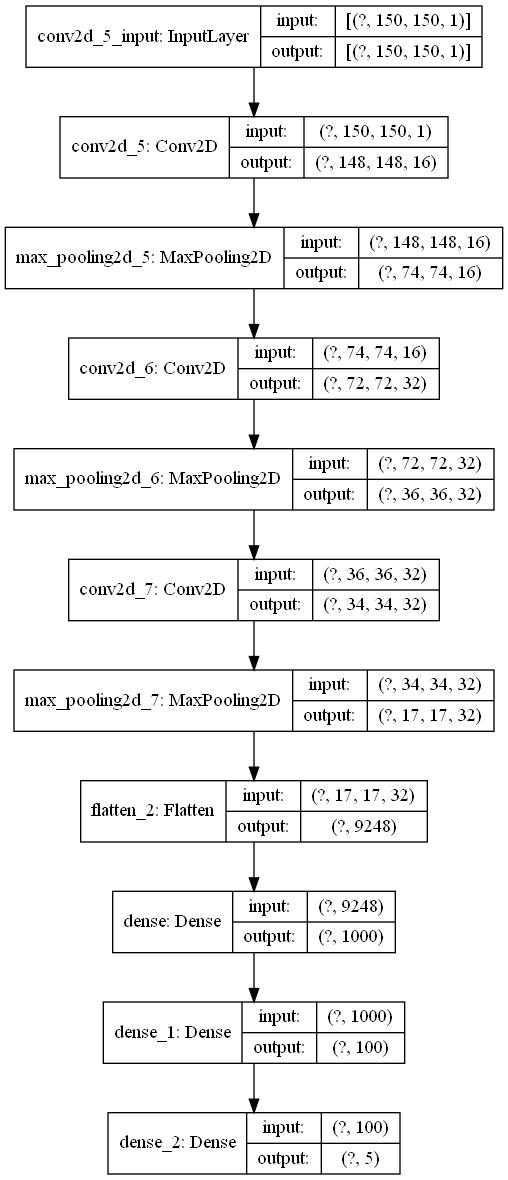

In [83]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

## 模型编译

In [84]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy','mse'])

In [86]:
train_X = np.array(X)
train_X.shape

(9000, 150, 150, 1)

In [88]:
train_y = np.array(y)
train_y.shape

(9000, 5)

In [90]:
result = model.fit(train_X/255.0,train_y,batch_size=128,epochs=15)

Epoch 1/15
71/71 [==============================] - 79s 1s/step - loss: 0.0727 - accuracy: 0.4594 - mse: 0.0727
Epoch 2/15
71/71 [==============================] - 81s 1s/step - loss: 0.0459 - accuracy: 0.5496 - mse: 0.0459
Epoch 3/15
71/71 [==============================] - 82s 1s/step - loss: 0.0308 - accuracy: 0.7126 - mse: 0.0308
Epoch 4/15
71/71 [==============================] - 82s 1s/step - loss: 0.0200 - accuracy: 0.8096 - mse: 0.0200
Epoch 5/15
71/71 [==============================] - 82s 1s/step - loss: 0.0154 - accuracy: 0.8544 - mse: 0.0154
Epoch 6/15
71/71 [==============================] - 83s 1s/step - loss: 0.0114 - accuracy: 0.8913 - mse: 0.0114
Epoch 7/15
71/71 [==============================] - 84s 1s/step - loss: 0.0082 - accuracy: 0.9216 - mse: 0.0082
Epoch 8/15
71/71 [==============================] - 84s 1s/step - loss: 0.0061 - accuracy: 0.9396 - mse: 0.0061
Epoch 9/15
71/71 [==============================] - 85s 1s/step - loss: 0.0041 - accuracy: 0.9594 - mse:

## 模型预测

In [111]:
model.predict(np.array([train_X[4]/255.0]))[0][0]

array([0.9833921 , 0.53111225, 0.19691822, 0.16793898, 0.18393852],
      dtype=float32)

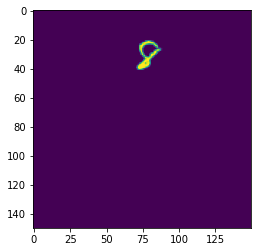

In [110]:
plt.imshow(train_X[4])

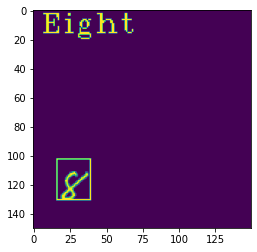

In [158]:
random = np.random.randint(len(train_X))
img = train_X[random]
result = model.predict(np.array([img/255.0]))[0]

if result[0] >0.6: ## 预测阈值
    cv2.putText(img,'Eight',(5,15),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,255,255),1)
else:
    cv2.putText(img,'Not Eight',(5,15),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,255,255),1)

x,y,w,h = result[1],result[2],result[3],result[4]
cv2.rectangle(img, (int((x-w/2)*150),int((y-h/2)*150)),(int((x+w/2)*150),int((y+h/2)*150)),(255,255,255),1 )

plt.imshow(img)